In [47]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from svm_margin_plot import plot_svm_boundary

In [8]:
df=pd.read_csv("./mouse_viral_study.csv")
X=df.drop("Virus Present",axis=1)
Y=df["Virus Present"]
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

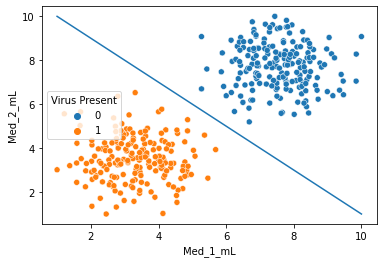

In [23]:
sbn.scatterplot(data=df,x="Med_1_mL",y="Med_2_mL",hue="Virus Present")
x=np.linspace(1,10,100)
c=11
m=-1
y=m*x+c
plt.plot(x,y)

In [36]:
model=SVC(kernel="linear",C=100)
model.fit(X,Y)
model.predict([[9,10]])

array([0])

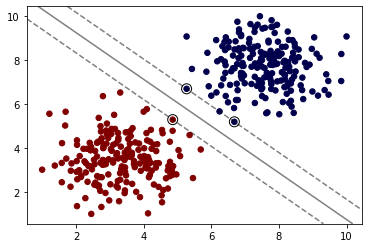

In [37]:
plot_svm_boundary(model,X,Y)

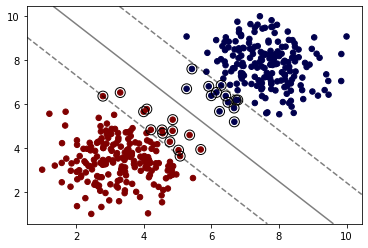

In [39]:
model=SVC(kernel="linear",C=0.025)  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

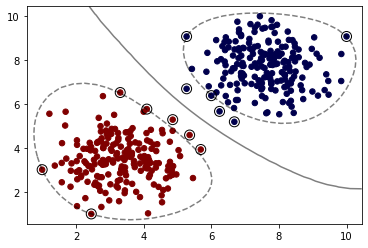

In [42]:
model=SVC(kernel="rbf")  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

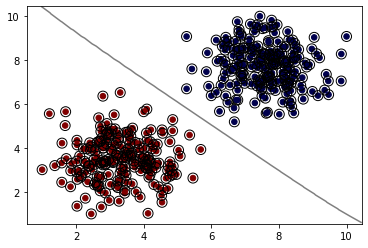

In [44]:
model=SVC(kernel="rbf",C=0.0023)  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

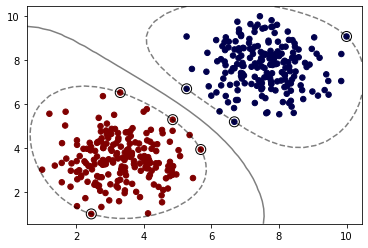

In [43]:
model=SVC(kernel="rbf",C=10000)  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

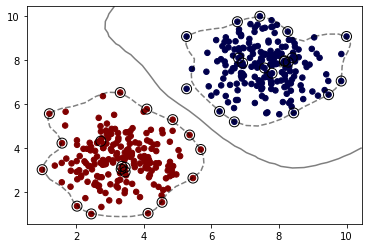

In [45]:
model=SVC(kernel="rbf",gamma="auto")  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

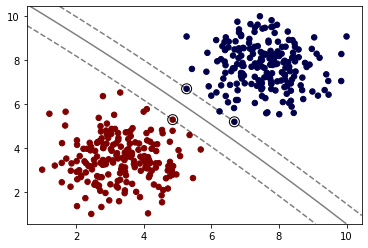

In [46]:
model=SVC(kernel="poly")  
model.fit(X,Y)
plot_svm_boundary(model,X,Y)

In [52]:
param_grid={"kernel":["poly","rbf","linear"],"C":[0.1,0.2,1,10,20],"gamma":["scale","auto"]}
grid_model=GridSearchCV(model,param_grid=param_grid)
grid_model.fit(X,Y)
grid_model.best_params_


{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}